In [2]:
from scripts.run_pytest import run_pytest

# すべて実行
run_pytest()

# 特定テストのみ
run_pytest(["-q", "tests/test_global_phase.py"])


............                                                             [100%]
12 passed in 0.97s
.                                                                        [100%]
1 passed in 0.75s


0

In [5]:
from scripts.df_rank_error import print_df_rank_error_curve, df_rank_error_curve

molecule_type = 5

# # rank を明示せず、自動で full_rank を推定して比率で評価
# print_df_rank_error_curve(rank_fractions=[1.0, 0.75, 0.5, 0.25], molecule_type=2)

# 比率も指定しない場合はデフォルトで [1.0, 0.75, 0.5, 0.25]
# print_df_rank_error_curve(molecule_type)

# # 点数を指定して自動サンプル（1.0→0.1の線形）
# print_df_rank_error_curve(num_points=5, molecule_type=2)

# 生データが欲しい場合
results = df_rank_error_curve(rank_fractions=[1.0, 0.9, 0.85, 0.4], molecule_type=2, tol=None)
results


[{'rank': 1.0,
  'full_rank': 3.0,
  'rank_frac': 0.3333333333333333,
  'abs_err': 0.6396801358668823,
  'rel_err': 0.286905350506253},
 {'rank': 3.0,
  'full_rank': 3.0,
  'rank_frac': 1.0,
  'abs_err': 2.022922624776835e-15,
  'rel_err': 9.073086565711427e-16}]

df reference: constant=4.603842e+00 constant_correction=0.000000e+00 one_body_correction_norm=1.561e+00 num_lambda=36 |lambda|min=4.031e-19 |lambda|max=1.172e+00 energy_ref=-3.236066e+00
sanity: G_list not Hermitian (max ||G-G†||=2.828e+00).
sanity: DF full-rank reconstruction mismatch (sparse rel=2.406e+00).
sanity: phase mismatch vs DF reference (dE_phase=+2.992e-01).
rz_count=7806
phase calibration: shift=+2.992e-01 energy_ref_eff=-2.936849e+00
t=2.500e-01 |<0|t>|=0.977925 leak=4.366e-02 phase_err=+2.132e-03 E_phase=-2.945378e+00 dE_phase=-8.529e-03 z=(+8.341e-03+i+8.831e-02) cosEt=0.742359 E_est=-3.185087e+00 dE=+5.098e-02
t=2.530e-01 |<0|t>|=0.977402 leak=4.468e-02 phase_err=+2.210e-03 E_phase=-2.945585e+00 dE_phase=-8.736e-03 z=(+8.539e-03+i+8.933e-02) cosEt=0.736427 E_est=-3.183884e+00 dE=+5.218e-02
t=2.560e-01 |<0|t>|=0.976873 leak=4.572e-02 phase_err=+2.290e-03 E_phase=-2.945795e+00 dE_phase=-8.946e-03 z=(+8.739e-03+i+9.035e-02) cosEt=0.730438 E_est=-3.182667e+00 dE=+5.340e-02

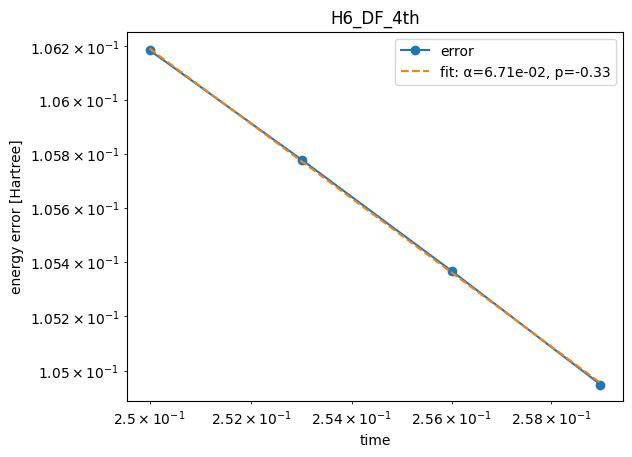

([0.25, 0.253, 0.256, 0.259],
 [0.10618496589912758,
  0.105778476198868,
  0.10536645710954522,
  0.10494888007390159])

In [2]:
from scripts.df_trotter_energy_plot import df_trotter_energy_error_plot

# DF 参照で摂動誤差を見る（Trotter誤差の切り分け用）
# df_trotter_energy_error_plot(
#     t_start=0.73, t_end=0.74, t_step=0.002,
#     molecule_type=2, pf_label="8th(Morales)",
#     rank=None, tol=0.0, estimator="perturbation",
#     reference="df",
# )

# df_trotter_energy_error_plot(
#     t_start=0.73, t_end=0.74, t_step=0.002,
#     molecule_type=2, pf_label="8th(Morales)",
#     rank=None, tol=0.0, estimator="perturbation",
#     reference="df",
# )

# df_trotter_energy_error_plot(
#     t_start=0.37, t_end=0.38, t_step=0.003,
#     molecule_type=4, pf_label="4th",
#     rank_fraction=1, estimator="perturbation",
#     reference="df",
# )

df_trotter_energy_error_plot(
    t_start=0.25, t_end=0.26, t_step=0.003,
    molecule_type=6, pf_label="4th",
    rank_fraction=1, estimator="perturbation",
    reference="df",
)

converged SCF energy = -2.09854593699772
converged SCF energy = -2.09854593699772
error exponent :3.9561544794560626
error coefficient :0.007153797223580998
r^2 (log-log): 0.9999999922610783


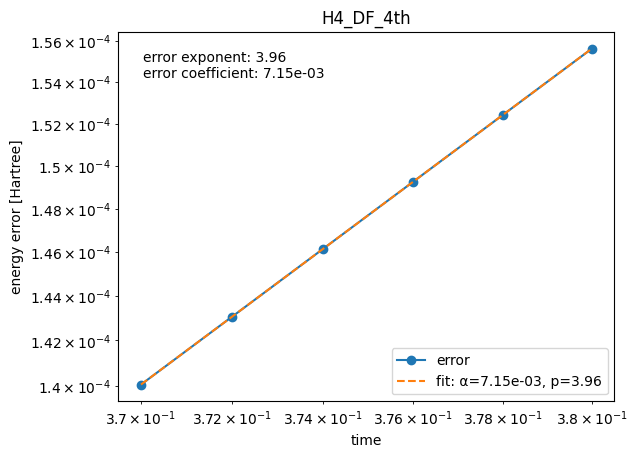

([0.37, 0.372, 0.374, 0.376, 0.378, 0.38],
 [0.00014004709594061225,
  0.00014306669024104863,
  0.00014613430454629727,
  0.0001492504274468813,
  0.00015241554965262136,
  0.00015563016369982805])

In [2]:
from scripts.df_trotter_energy_plot_perturb import df_trotter_energy_error_plot_perturb

df_trotter_energy_error_plot_perturb(
    t_start=0.37, t_end=0.38, t_step=0.002,
    molecule_type=4, pf_label="4th",
    rank_fraction=0.9, reference="exact",
)



converged SCF energy = -3.13553221396632
exact reference: energy_ref=-3.236066e+00 <psi0|H|psi0>=-3.236066e+00
sanity: G_list not Hermitian (max ||G-G†||=2.828e+00).
sanity: DF full-rank reconstruction mismatch (sparse rel=2.406e+00).
rz_count=7812
t=2.500e-01 |<0|t>|=0.969926 leak=5.924e-02 phase_err=-1.215e-01 E_phase=-2.750186e+00 dE_phase=+4.859e-01 z=(-4.701e-01+i+1.489e-01) cosEt=0.690210 E_est=-3.181006e+00 dE=+5.506e-02
t=2.530e-01 |<0|t>|=0.969215 leak=6.062e-02 phase_err=-1.229e-01 E_phase=-2.750417e+00 dE_phase=+4.856e-01 z=(-4.695e-01+i+1.506e-01) cosEt=0.683153 E_est=-3.179711e+00 dE=+5.636e-02
t=2.560e-01 |<0|t>|=0.968495 leak=6.202e-02 phase_err=-1.243e-01 E_phase=-2.750652e+00 dE_phase=+4.854e-01 z=(-4.689e-01+i+1.522e-01) cosEt=0.676031 E_est=-3.178401e+00 dE=+5.767e-02
t=2.590e-01 |<0|t>|=0.967769 leak=6.342e-02 phase_err=-1.257e-01 E_phase=-2.750889e+00 dE_phase=+4.852e-01 z=(-4.683e-01+i+1.539e-01) cosEt=0.668846 E_est=-3.177078e+00 dE=+5.899e-02
error exponent :0.1

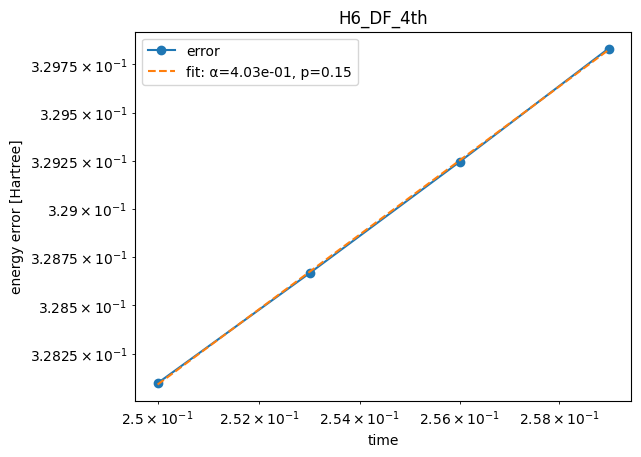

([0.25, 0.253, 0.256, 0.259],
 [0.32809716037448877,
  0.3286671639651437,
  0.3292455766609317,
  0.3298324653702454])

In [1]:
from scripts.df_trotter_energy_plot import df_trotter_energy_error_plot
df_trotter_energy_error_plot(
    t_start=0.25, t_end=0.26, t_step=0.003,
    molecule_type=6, pf_label="4th",
    rank_fraction=1.0, tol=0.0,
    estimator="perturbation", reference="exact",
)


In [16]:
from scripts.df_trotter_energy_plot_perturb import df_phase_match_times

E0, t_list = df_phase_match_times(
    molecule_type=4,
    n_values=[1, 2, 3, 4],
    rank_fraction=0.45,
    use_abs_energy=True,  # True なら E0 の符号に関係なく t>0
)

print("E0 =", E0)
print("t_list =", t_list)


converged SCF energy = -2.09854593699772
E0 = -2.1664244148133314
t_list = [0.3625319942053559, 0.7250639884107118, 1.0875959826160677, 1.4501279768214237]


converged SCF energy = -2.09854593699772
converged SCF energy = -2.09854593699772
error exponent :3.095629393882893
error coefficient :0.003842502904660019
r^2 (log-log): 0.9999886611481091


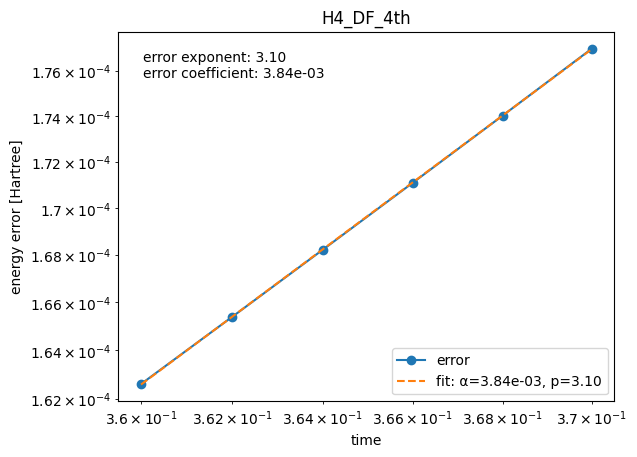

total_rotations (4th, H4): 5.625e+07
pauli rotations (DF circuit): 1436
H4_sto-3g_singlet_distance_100_charge_0
converged SCF energy = -2.09854593699772
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:


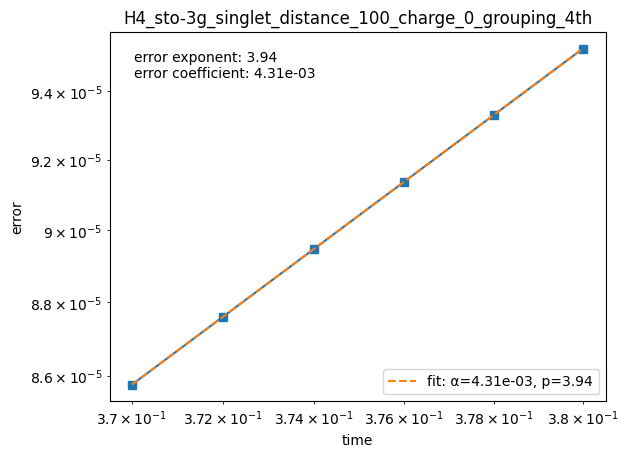

total_rotations (4th, H4) from QC-GR: 3.635e+07
pauli rotations (QC-GR circuit): 1116


(36354487.827579565,
 0.004572324528859247,
 1116,
 [0.37, 0.372, 0.374, 0.376, 0.378, 0.38],
 [array([8.57615385e-05]),
  array([8.76030054e-05]),
  array([8.94735079e-05]),
  array([9.13733346e-05]),
  array([9.33027753e-05]),
  array([9.52621207e-05])],
 LogLogFitResult(slope=3.939578500820287, intercept=-2.3656017103499662, coeff=0.004309216257483895, r2=0.9999999852553434))

In [19]:
from trotterlib.cost_extrapolation import df_trotter_total_rotations, trotter_qc_gr_total_rotations
df_trotter_total_rotations(
    t_start=0.36, t_end=0.37, t_step=0.002,
    molecule_type=4, pf_label="4th",
    rank_fraction=0.44, reference="exact",
)

trotter_qc_gr_total_rotations(
        t_start=0.37, t_end=0.38, t_step=0.002,
    molecule_type=4, pf_label="4th",
)

In [1]:
from trotterlib.qiskit_time_evolution_pyscf import grouped_jw_list_stats

stats = grouped_jw_list_stats(4)
print(stats)


converged SCF energy = -2.09854593699772
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:
original terms: 184
group count: 13
grouped terms (sum): 204
reduction ratio (groups/original terms): 0.071
avg terms per group: 14.15
{'original_terms': 184, 'group_count': 13, 'grouped_terms': 204, 'reduction_ratio': 0.07065217391304347, 'avg_terms_per_group': 14.153846153846153}
